<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Constants" data-toc-modified-id="Constants-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Constants</a></span></li><li><span><a href="#Generate-stimulus" data-toc-modified-id="Generate-stimulus-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Generate stimulus</a></span></li><li><span><a href="#Plot" data-toc-modified-id="Plot-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Plot</a></span></li></ul></div>

The goal of this notebook, for now, is to plot the posterior over the state for 50 trials, and overlay sounds and sources. And to do so for the report and the prediction task.

### Imports

In [1]:
import os, sys
sys.path.append(os.path.expanduser('~/Git/GitHub/work/Analysis_Audio2AFC_ChangePoint/Python_modules'))
import mmcomplexity as mmx
import matplotlib.pyplot as plt
%matplotlib inline

### Constants

In [2]:
num_trials = 30
h = 0.1

### Generate stimulus

In [3]:
# generate data
sim_data = mmx.Audio2AFCSimulation(num_trials, [h], 0, [1], catch_rate=0)
# sim_data.data.head()  # if you want to look at it

# here we extract a StimulusBlock object to feed into the observer model
sounds=list(sim_data.data['soundLoc'])
sources=list(sim_data.data['soundLoc'])
stim_block = mmx.StimulusBlock(num_trials, h, sources=sources, sounds=sounds)
# print(stim_block)

# Now we create an observer model
dm = mmx.KnownHazard(stim_block)
dm.observe()  # we freeze the observations

# we run the decision making algorithms for discrimination and prediction
discrimination_decisions = list(dm.process())
prediction_decisions = list(dm.process(filter_step=1))

# turn log posterior odds into posterior over 'right' side
discrimination_posterior = [mmx.log_odds_to_posterior(d[0])['right'] for d in discrimination_decisions]
prediction_posterior = [mmx.log_odds_to_posterior(d[0])['right'] for d in prediction_decisions]

# append posteriors to data frame
sim_data.data['pred'] = prediction_posterior
sim_data.data['discr'] = discrimination_posterior
# sim_data.data.head()  # inspect if you wish

### Plot

<function matplotlib.pyplot.show(*args, **kw)>

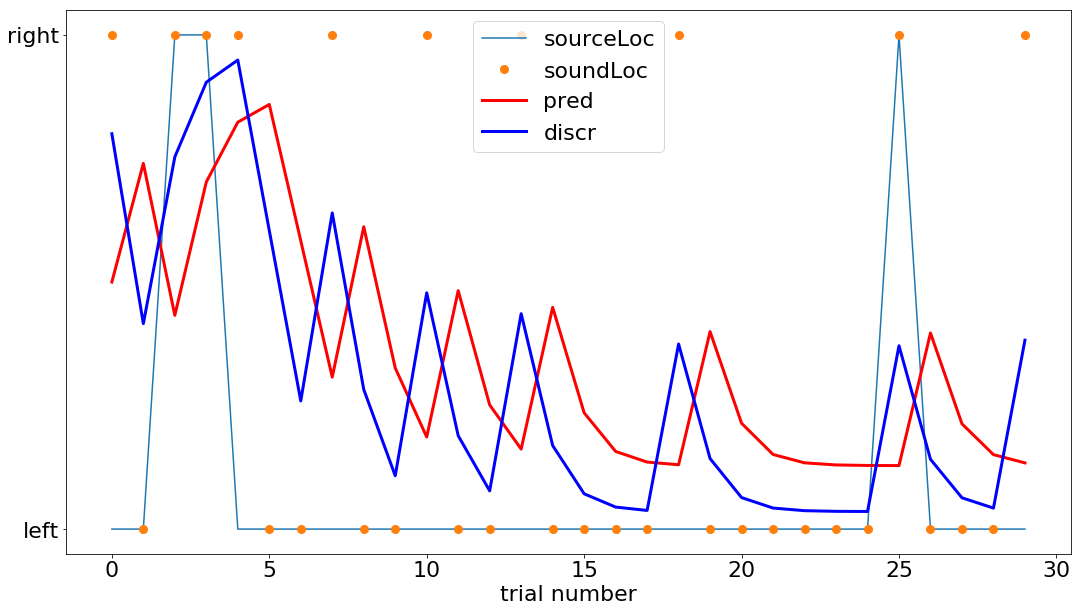

In [4]:
plt.rcParams.update({'font.size': 22})
fig = plt.figure(figsize=(18, 10))
plt.plot(range(num_trials), sim_data.data['sourceLoc'])
plt.plot(range(num_trials), sim_data.data['soundLoc'], 'o', markersize=8)
plt.plot(range(num_trials), sim_data.data['pred'], linewidth=3, color='r')
plt.plot(range(num_trials), sim_data.data['discr'], linewidth=3, color='b')
plt.xlabel('trial number')
plt.legend()
plt.show